In [9]:
import os
import pymysql
import pandas as pd

In [7]:
host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')

password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')

conn = pymysql.connect(host = '10.100.77.72', port = int(3309),user = 'usuario', passwd = 'IFAM', db = 'bd_teste', charset = 'utf8mb4')

In [10]:
df = pd.read_sql_query('show tables', conn)
df.head(10)

C:\Users\Aluno\AppData\Local\Temp\ipykernel_3172\1114934367.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('show tables', conn)


,Tables_in_bd_teste
0,bairro
1,cidade
2,cliente
3,clientes_casados
4,clientes_divorciados
5,clientes_solteiros
6,estadocivil
7,filial
8,fornecedor
9,funcionario


In [11]:
df = pd.read_sql_query('select * from bairro inner join cliente on baicodigo = clibaicodigo inner join estadocivil on estcodigo = cliestcodigo', conn)
df.head(10)

C:\Users\Aluno\AppData\Local\Temp\ipykernel_3172\830643392.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query('select * from bairro inner join cliente on baicodigo = clibaicodigo inner join estadocivil on estcodigo = cliestcodigo', conn)


,baicodigo,bainome,baizoncodigo,baiqtdepessoas,baicidcodigo,clicodigo,clisexo,clirendamensal,clinome,clibaicodigo,clifone,cliestcodigo,estcodigo,estdescricao
0,9,EDUCANDOS,2,47,1,1,M,2100.0,GANDERSON DOS SANTOS,9,,1,1,Solteiro
1,5,PLANALTO,5,55,1,2,M,3220.0,FRANCISCO DOS SANTOS OLIVEIRA,5,,1,1,Solteiro
2,1,CIDADE NOVA,1,55,1,4,M,1330.0,CARLOS SOUZA MAGALHAES,1,,1,1,Solteiro
3,8,JAPIIM,2,46,1,6,F,2660.0,MARIA R MARTINS,8,,1,1,Solteiro
4,11,SAO JOSE,3,47,1,7,M,5880.0,FRANCISCO M MONTEIRO,11,,1,1,Solteiro
5,3,CACHOEIRINHA,2,50,1,9,F,2800.0,FRANCISCA S CASTRO,3,,1,1,Solteiro
6,7,COROADO,3,46,1,10,M,2002.0,EDMAR F DA SILVA,7,,1,1,Solteiro
7,4,ALEIXO,6,49,1,12,F,1540.0,RAFAELA C DOS SANTOS,4,,1,1,Solteiro
8,4,ALEIXO,6,49,1,14,F,5320.0,MARIA DA GLORIA MESQUITA,4,,1,1,Solteiro
9,2,CENTRO,2,49,1,16,F,1064.0,KATRINA S ALBUQUERQUE,2,,1,1,Solteiro


In [13]:
df.query('bainome == "ALEIXO" & clisexo == "F"')

,baicodigo,bainome,baizoncodigo,baiqtdepessoas,baicidcodigo,clicodigo,clisexo,clirendamensal,clinome,clibaicodigo,clifone,cliestcodigo,estcodigo,estdescricao
7,4,ALEIXO,6,49,1,12,F,1540.0,RAFAELA C DOS SANTOS,4,,1,1,Solteiro
8,4,ALEIXO,6,49,1,14,F,5320.0,MARIA DA GLORIA MESQUITA,4,,1,1,Solteiro
81,4,ALEIXO,6,49,1,123,F,1295.0,ERIKA MALAFAIA MARINHO,4,,1,1,Solteiro
120,4,ALEIXO,6,49,1,178,F,950.6,MARIA DE FATIMA FERREIRA MATOS,4,,1,1,Solteiro
161,4,ALEIXO,6,49,1,233,F,1050.0,SUZANA RIBEIRO LOPES,4,,1,1,Solteiro
238,4,ALEIXO,6,49,1,343,F,1295.0,EDIMEIA DA SILVA PICANCO,4,,1,1,Solteiro
269,4,ALEIXO,6,49,1,387,F,1120.0,ZILENE SILVA SANTOS,4,,1,1,Solteiro
291,4,ALEIXO,6,49,1,420,F,1120.0,TEREZINHA MENDES ROLIM,4,,1,1,Solteiro
314,4,ALEIXO,6,49,1,453,F,756.0,ROSA DE ARAUJO SARAIVA,4,,1,1,Solteiro
323,4,ALEIXO,6,49,1,464,F,756.0,RAIMUNDA BARBOSA NICACIO,4,,1,1,Solteiro


In [14]:
df.groupby(['bainome', 'clisexo',]).size()

bainome       clisexo
ALEIXO        F          22
              M          27
CACHOEIRINHA  F          16
              M          33
              f           1
CENTRO        F          25
              M          24
CIDADE NOVA   F          29
              M          20
COROADO       F          13
              M          33
EDUCANDOS     F          20
              M          28
JAPIIM        F          24
              M          22
PARQUE 10     F          23
              M          24
PLANALTO      F          25
              M          29
PONTA NEGRA   F          22
              M          23
SAO JOSE      F          19
              M          28
dtype: int64

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [17]:
mpl.__version__

'3.7.1'

In [18]:
x0 = [n for n in range(1001)]
y0 = [n + 10 for n in x0]

Text(0.5, 1.0, 'Função de Crescimento Linear')

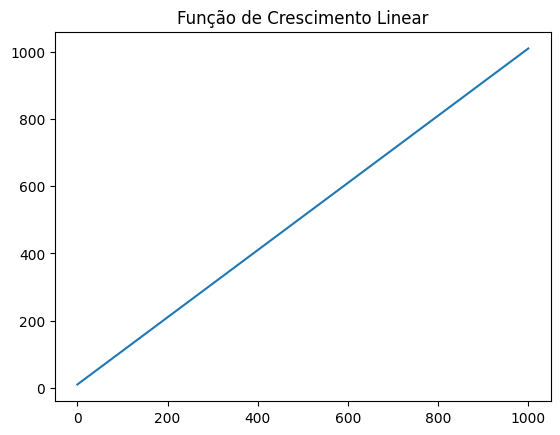

In [19]:
plt.plot(x0, y0)
plt.title('Função de Crescimento Linear')

In [20]:
x1 = [n for n in range(1001)]
y1 = [n * n for n in x1]

Text(0.5, 1.0, 'Função Quadrática')

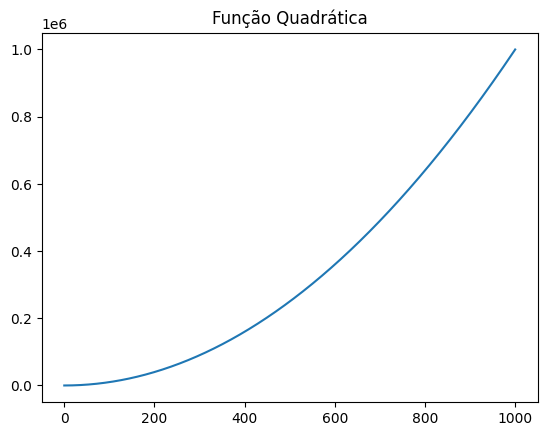

In [22]:
plt.plot(x1, y1)
plt.title('Função Quadrática')

Text(0.5, 1.0, 'Função Cúbica')

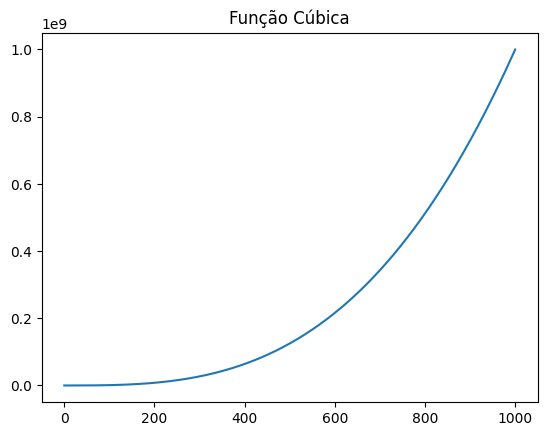

In [23]:
x2 = [n for n in range(1001)]
y2 = [n * n * n for n in x2]

plt.plot(x2, y2)
plt.title('Função Cúbica')

Text(0.5, 1.0, 'Função Exponencial')

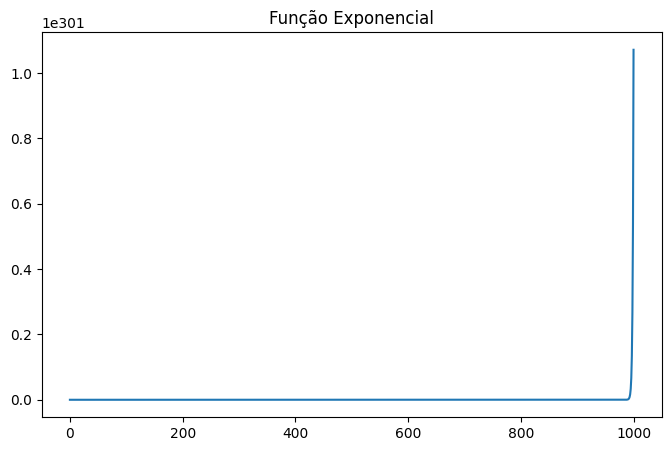

In [30]:
x3 = [n for n in range(1001)]
y3 = [2 ** n for n in x3]

plt.figure(figsize=(8, 5))

plt.plot(x3, y3)
plt.title('Função Exponencial')